<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/Admissions%20Pipeline%20and%20Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok:

Good point of lots of data that are not used

Yes Sankey is awesome. And good to start with to set the stage. And good point about chronological v logical.

Nice to start with inquiries!

Very nice graph over time admit coming v enrolled. Nice organization.
I like what if

Yes do automate

# Graduate Admissions Data - Erick Watt-Udogu

This project was designed to take the massive amounts of unused application data and make it accessible. 

Initially, the desire was to create a regression model application quantity or enrollment conversion, but it became abundantly clear that simply telling the story of the current status of the pipeline would be a herculean effort. 

The current iteration is the one that I will use to present monthly progress to my colleagues in the dean's suite and my team. I have shared it with consultants and campus colleagues. 

In the future, I want to create OLS regressions, but ther is more data to gather. 

# Setup and Upload Files
Run this for data and setup code. 

## Setup

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

!pip install squarify
import squarify 

!pip install adjustText 
from adjustText import adjust_text

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('seaborn-white')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

!pip install leafmap
!pip install pycrs
!pip install osmnx

#Pywaffle
!pip install pywaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

#plotly
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted

#ton of dependencies; also saying here which for what not to get lost
import leafmap
import pycrs #may be needed for some imported data such as shapefiles
import geopandas #may be needed to for some files such a kml
import osmnx #for geocoding, eg we geocode camden
! pip install geocoder                                                                                       
from geopy.geocoders import Nominatim 

import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-1-d13ede4d0c9b>:64: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

## Data Upload

### Camden Comparison

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CompReports.csv", "comps")

('comps', <http.client.HTTPMessage at 0x7f9b7254bc10>)

In [ ]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'comps', 'sample_data']

In [ ]:
comps=pd.read_csv('comps')

### Rutgers Comparison

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/CampCompReports.csv", "campcomps")

('campcomps', <http.client.HTTPMessage at 0x7f9b7254b250>)

In [ ]:
campcomps=pd.read_csv('campcomps')

### Program Pipeline

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/ProgramDetails.csv", "programs")

('programs', <http.client.HTTPMessage at 0x7f9b7254b0a0>)

In [ ]:
programs=pd.read_csv('programs')

### Year Over Year Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/YoYCompReports.csv", "yoy")

('yoy', <http.client.HTTPMessage at 0x7f9b7254ba30>)

In [ ]:
yoy=pd.read_csv('yoy')

### Historical Data 

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/historical.csv", "hist")

('hist', <http.client.HTTPMessage at 0x7f9b7254b400>)

In [ ]:
hist=pd.read_csv('hist')

### Fall 2023 Application Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Fall23AppData.csv", "fallapps")

('fallapps', <http.client.HTTPMessage at 0x7f9b3b51c190>)

In [ ]:
fall=pd.read_csv('fallapps')

### Race Data 

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/race.csv", "race")

('race', <http.client.HTTPMessage at 0x7f9b3b51eb90>)

In [ ]:
race=pd.read_csv('race')

### Date Data 

In [ ]:
#I removed the visualizations this supported, I plan to save this for later. 
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/progmonth.csv", "progmonth")

('progmonth', <http.client.HTTPMessage at 0x7f9b3b51db10>)

In [ ]:
progmonth=pd.read_csv('progmonth')

### Name Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Names.csv", "namel")

('namel', <http.client.HTTPMessage at 0x7f9b3b51cc10>)

### AC Data for Treemap

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Program%20AC.csv", "AC")

('AC', <http.client.HTTPMessage at 0x7f9b3b56c370>)

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/Program%20Apps.csv", "AppsTotal")

('AppsTotal', <http.client.HTTPMessage at 0x7f9b3b56fb80>)

### App Data for Treemap

In [ ]:
AppsTotal=pd.read_csv('AppsTotal')
AppsTotal.head(3)

index                                 Program  Total  \
0      1                                 Biology     55   
1      2  Biology: Computational and Integrative    124   
2      3                    Business and Science     24   

   Percent International Category  Mid  
0                   56.4     STEM   50  
1                   68.5     STEM   50  
2                   70.8     STEM   50

### Geographical Data for Map

In [ ]:
#This data needs to be updated with new applications.
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/locations.csv", "geo")

('geo', <http.client.HTTPMessage at 0x7f9b3b56fa30>)

In [ ]:
geo=pd.read_csv('geo')

In [ ]:
geo.head(3)

City        Lat       Long  \
0     Abaam   6.217532  -0.831562   
1  Abeokuta   7.160800   3.348300   
2  Aberdeen  45.464900 -98.468600   

                                        Program        Status  
0                                Chemistry (MS)  Complete App  
1  Biology: Computational and Integrative (PHD)  Admit-Coming  
2                         Forensic Science (MS)  Admit-Coming

### Pipeline Data for Sankey

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/pipeline.csv", "pipe")

('pipe', <http.client.HTTPMessage at 0x7f9b3b56f6a0>)

In [ ]:
pipe=pd.read_csv('pipe')

# Graduate Admissions Dashboard

This project was designed to tell the story of graduate admissions on the Camden campus for fall 2023. 

The desired outcomes of this visualization include: 

1.   Defining the Process
2.   Determining the health of the pipeline 
3.   Disaggregating the Data 

## What is the Admissions Pipeline
 
It is common to display the admissions pipeline as a tube or a funnel, but these images are inadequate. The Sankey is the best visualization tool I have ever used to convey the relationship between steps in the process. 

###Year over Year

In [ ]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      thickness = 25,
      line = dict(color = "black", width = .5),
      label = pipe.label,
      color = "#cc0033"
    ),
    link = dict(
          
      # indices correspond to labels!!!
      source = pipe.source, 
      target = pipe.target,
      value  = pipe.value
  ))])
  
fig.show()

Too often this data is displayed chronologically rather than logically. What I wanted to do here is convey the complexity of the relationship between steps and define the steps by showing their place in the process. 

I also added information showing the weakness of our marketing efforts to create leads and the current weakness of our enrollment numbers. I added the these visualization to argue that we need to increase our efforts at the beginninngand end of the process. 

## Health of the Pipeline Determined by Comparison 

Data is useful only through comparison. So this section is designed to compare our current pipeline against history, our campus and university and various what-if scenarios. 

### Comparison Against the Past Five Years 

In [ ]:
fig = px.line(hist, x="Year", y="Value", color='Status')
fig.show()

This visualization is important because it helps to show the historical relationship between AC and enrollment. 

We can see that there has been a steady increase in the size of the number of admit coming students and overall enrollment. Despite the commonly held belief that last year was challenging, it was only challenging for the Graduate School in comparison to the best year ever experienced. But it should be noted that the conversion rate from AC to enrollment has been in decline since 2018. 



## Comparison Against 2022 

In [ ]:
#decided to ditch the bar graphs, I think this conveys what I want in a cleaner way. 
fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 1319,
    mode = "gauge+number+delta",
    title = {'text': "2023 SUBMITTED APPLICATIONS (SCARLET) <br> Point in Time (Grey) & 2022 Total (Black)"},
    delta = {'reference': 527},
    gauge = {'axis': {'range': [None, 1500]},
             'bar': {'color': "#cc0033"},
             'steps' : [
                 {'range': [0, 527], 'color': "gray"},
                 {'range': [527, 886], 'color': "black"}],
             'threshold' : {'line': {'color': "#cc0033", 'width': 10}, 'thickness': 0.75, 'value': 1500}}))

fig.show()

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 569,
    mode = "gauge+number+delta",
    title = {'text': "2023 ADMITTED APPLICATIONS (SCARLET)<br> Point in Time (Grey) & 2022 Total (Black)"},
    delta = {'reference': 227},
    gauge = {'axis': {'range': [None, 800]},
             'bar': {'color': "#cc0033"},
             'steps' : [
                 {'range': [0, 227], 'color': "gray"},
                 {'range': [227, 455], 'color': "black"}],
             'threshold' : {'line': {'color': "#cc0033", 'width': 10}, 'thickness': .75, 'value': 800}}))

fig.show()

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 291,
    mode = "gauge+number+delta",
    title = {'text': "2023 ADMIT COMING (AC) (Scarlet) <br> Point in Time (Grey) & 2022 Total (Black)"},
    delta = {'reference': 142},
    gauge = {'axis': {'range': [None, 400]},
             'bar': {'color': "#cc0033"},
             'steps' : [
                 {'range': [0, 142], 'color': "gray"},
                 {'range': [142, 239], 'color': "black"}],
             'threshold' : {'line': {'color': "#cc0033", 'width': 10}, 'thickness': 0.75, 'value': 375}}))

fig.show()

The graduate school is experiencing unprecedented growth in the number of applications. As of April 5, we have more applications than last cycle and that we nearly have as many admitted students as we had total applications a year ago. 

It should be noted that it is very early in the recruitment cycle and the numbers reported here are leading indicators to matriculation. 

### Disaggregating the Applications and ACs by Program

In [ ]:
#Going to break this up into to figs, Applicants and AC and fix the organization a bit. 
fig = px.treemap(AppsTotal, path=[px.Constant("Submitted Apps"), 'Category', 'Program'], values='Total',
                  color='Percent International', hover_data=['Program'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(AppsTotal['Mid'], weights=AppsTotal['Total']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig = px.treemap(AC, path=[px.Constant("Admit-Coming (AC)"), 'Category', 'Program'], values='Total AC',
                  color='Percent International', hover_data=['Program'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(AC['Mid'], weights=AC['Total AC']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

Application and AC data in aggregate is useful if you are the law school where everyone generally has the same program, but for our diverse group of programs, disaggregation is mandatory. 

This data helps to determine why some of the numbers are so large. 

*   STEM programs are driving application and AC growth.
*   International students are driving application and AC growth. 
*   Application number and AC number have a weaker correlation than one my assume. 

###Comparisons Against the Campus and the University

In [ ]:
fig = px.scatter(comps, x="Percent Change of ACs Over 2022", y="Count of ACs",
                 symbol='Classification', color="Change in Count of ACs Over 2022",
                 size="Count of ACs", hover_data=['Category'],width=1200,height=600,
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Rutgers-Camden Admitted-Coming (AC) Students Across Variables with What-if Analysis') 

fig = px.scatter(campcomps, x="Percent Change of ACs Over 2022", y="Count of ACs",
                 symbol='Classification', color="Change in Count of Acs Over 2022",
                 size="Count of ACs", hover_data=['School'],width=1200,height=600,
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Rutgers Graduate Schools Admitted-Coming (AC) Students Across Variables with What-if Analysis') 

In addition to comparisons against other schools and groups on campus, based on the treemap data, I wanted to see how the Graduate School's performance would compare if we:

* Didn't have new programs 
* Our programs that have over 100 applications had the maximum number of ACs as they could enroll
* If the new programs existed on their own. 

When I control for these variables, the Grduate School is performing well. 

## Who Applied 

This section provides an analysis of who has has applied this cycle. 

### Summary: If the Applicant Pool was 10 People 

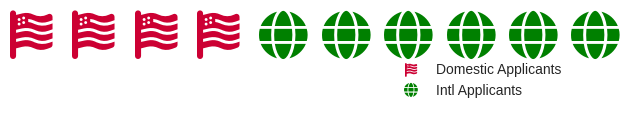

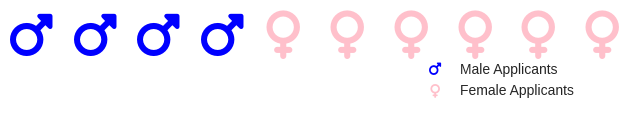

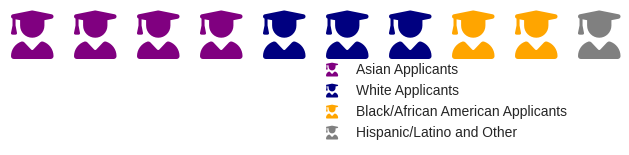

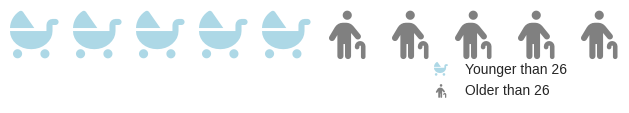

In [ ]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=1,
    values=[4, 6],
    interval_ratio_x=25,
    interval_ratio_y=0.5,
    colors=["#cc0033", "green"],
    icons=['flag-usa', 'globe'],
    font_size=35,
    icon_style='solid',
    icon_legend=True,
legend={
        'labels': ['Domestic Applicants', 'Intl Applicants'], 
        'loc': 'best', 
        'bbox_to_anchor': (1, 1)
    }
)

fig = plt.figure(
    FigureClass=Waffle,
    rows=1,
    values=[4, 6],
    interval_ratio_x=25,
    interval_ratio_y=0.5,
    colors=["blue", "pink"],
    icons=['mars', 'venus'],
    font_size=35,
    icon_style='solid',
    icon_legend=True,
legend={
        'labels': ['Male Applicants', 'Female Applicants'], 
        'loc': 'best', 
        'bbox_to_anchor': (1, 1)
    }
)

fig = plt.figure(
    FigureClass=Waffle,
    rows=1,
    values=[4, 3, 2, 1],
    interval_ratio_x=25,
    interval_ratio_y=0.5,
    colors=["purple", "navy","orange","grey"],
    icons='user-graduate',
    font_size=35,
    icon_style='solid',
    icon_legend=True,
legend={
        'labels': ['Asian Applicants', 'White Applicants','Black/African American Applicants','Hispanic/Latino and Other'], 
        'loc': 'best', 
        'bbox_to_anchor': (1, 1)
    }
)

fig = plt.figure(
    FigureClass=Waffle,
    rows=1,
    values=[5, 5],
    interval_ratio_x=25,
    interval_ratio_y=0.5,
    colors=["lightblue", "grey"],
    icons=['baby-carriage', 'person-cane'],
    font_size=35,
    icon_style='solid',
    icon_legend=True,
legend={
        'labels': ['Younger than 26', 'Older than 26'], 
        'loc': 'best', 
        'bbox_to_anchor': (1, 1)
    }
)

While this might not be something I would add to a journal, it is something that I might place on the website and will help to provide memorable context as I outline who has applied. 

###Age by Program

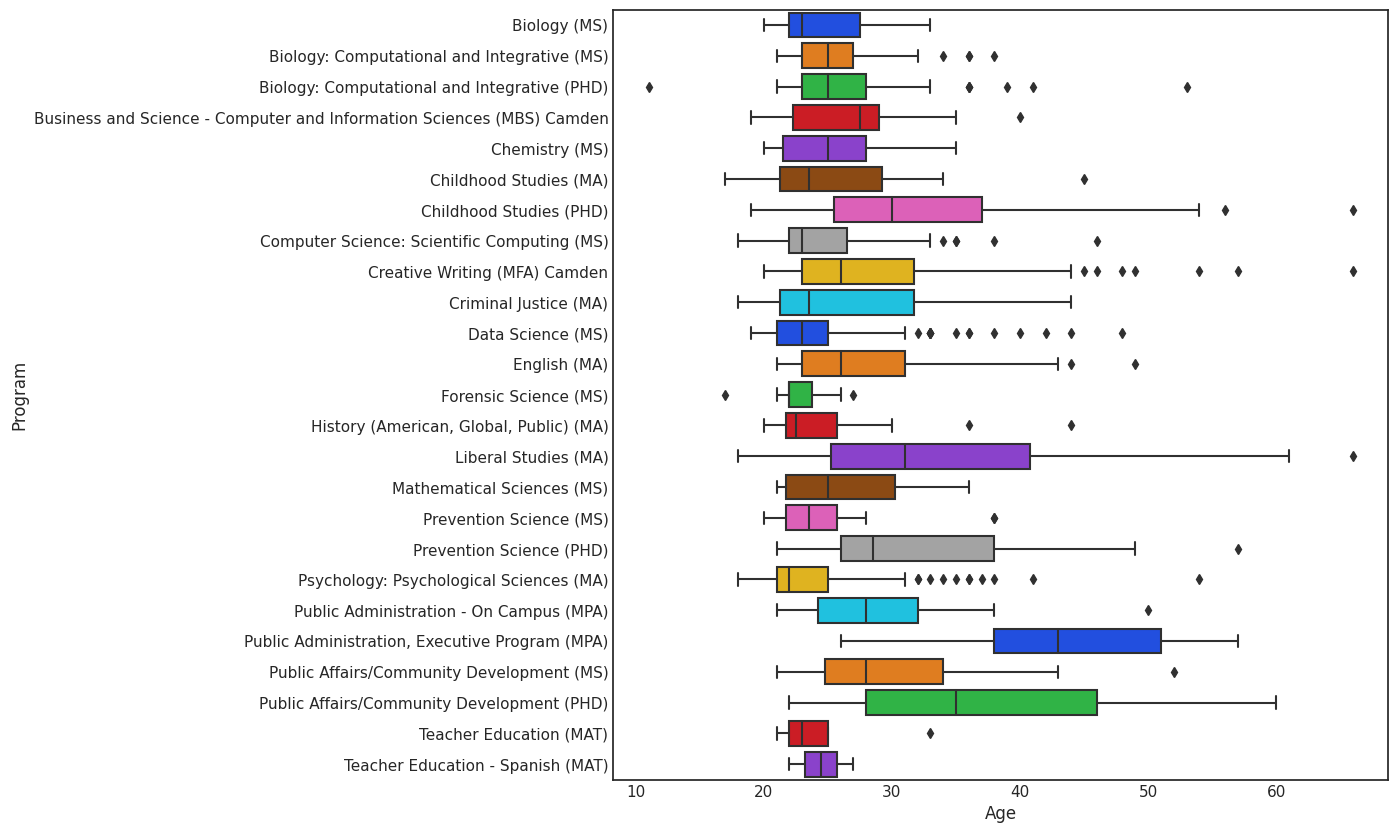

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

import seaborn as sns
sns.set_theme(style="whitegrid")

my_order = fall.groupby(by=["Program"])["Age"].median('Age').iloc[::1].index
 
sns.boxplot(x='Age', y='Program', palette="bright", data=fall, order=my_order);

This is a great case for disaggregation of data. The EMPA figure is not surprising but the Data Science and Public Affairs numbers certainly are. 

### Gender by Program

0 Gender
Female    0.545455
Male      0.454545
Name: 0, dtype: float64


Text(0.2727272727272727, 0, '54 %')

Text(0.7727272727272727, 0, '45 %')

1 Gender
Female    0.56
Male      0.44
Name: 1, dtype: float64


Text(0.28, 1, '56 %')

Text(0.78, 1, '44 %')

2 Gender
Female    0.452055
Male      0.547945
Name: 2, dtype: float64


Text(0.22602739726027396, 2, '45 %')

Text(0.726027397260274, 2, '54 %')

3 Gender
Female    0.428571
Male      0.571429
Name: 3, dtype: float64


Text(0.21428571428571427, 3, '42 %')

Text(0.7142857142857142, 3, '57 %')

4 Gender
Female    0.466667
Male      0.533333
Name: 4, dtype: float64


Text(0.23333333333333334, 4, '46 %')

Text(0.7333333333333334, 4, '53 %')

5 Gender
Female    0.857143
Male      0.142857
Name: 5, dtype: float64


Text(0.42857142857142855, 5, '85 %')

Text(0.9285714285714285, 5, '14 %')

6 Gender
Female    0.846154
Male      0.153846
Name: 6, dtype: float64


Text(0.4230769230769231, 6, '84 %')

Text(0.9230769230769231, 6, '15 %')

7 Gender
Female    0.362637
Male      0.637363
Name: 7, dtype: float64


Text(0.1813186813186813, 7, '36 %')

Text(0.6813186813186813, 7, '63 %')

8 Gender
Female    0.644928
Male      0.355072
Name: 8, dtype: float64


Text(0.322463768115942, 8, '64 %')

Text(0.822463768115942, 8, '35 %')

9 Gender
Female    0.538462
Male      0.461538
Name: 9, dtype: float64


Text(0.2692307692307692, 9, '53 %')

Text(0.7692307692307692, 9, '46 %')

10 Gender
Female    0.311295
Male      0.688705
Name: 10, dtype: float64


Text(0.15564738292011018, 10, '31 %')

Text(0.6556473829201102, 10, '68 %')

11 Gender
Female    0.432432
Male      0.567568
Name: 11, dtype: float64


Text(0.21621621621621623, 11, '43 %')

Text(0.7162162162162162, 11, '56 %')

12 Gender
Female    0.681818
Male      0.318182
Name: 12, dtype: float64


Text(0.3409090909090909, 12, '68 %')

Text(0.8409090909090908, 12, '31 %')

13 Gender
Female    0.75
Male      0.25
Name: 13, dtype: float64


Text(0.375, 13, '75 %')

Text(0.875, 13, '25 %')

14 Gender
Female    0.785714
Male      0.214286
Name: 14, dtype: float64


Text(0.39285714285714285, 14, '78 %')

Text(0.8928571428571428, 14, '21 %')

15 Gender
Female    0.5
Male      0.5
Name: 15, dtype: float64


Text(0.25, 15, '50 %')

Text(0.75, 15, '50 %')

16 Gender
Female    0.916667
Male      0.083333
Name: 16, dtype: float64


Text(0.4583333333333333, 16, '91 %')

17 Gender
Female    0.73913
Male      0.26087
Name: 17, dtype: float64


Text(0.3695652173913043, 17, '73 %')

Text(0.8695652173913043, 17, '26 %')

18 Gender
Female    0.80315
Male      0.19685
Name: 18, dtype: float64


Text(0.4015748031496063, 18, '80 %')

Text(0.9015748031496064, 18, '19 %')

19 Gender
Female    0.433333
Male      0.566667
Name: 19, dtype: float64


Text(0.21666666666666667, 19, '43 %')

Text(0.7166666666666667, 19, '56 %')

20 Gender
Female    0.461538
Male      0.538462
Name: 20, dtype: float64


Text(0.23076923076923078, 20, '46 %')

Text(0.7307692307692308, 20, '53 %')

21 Gender
Female    0.583333
Male      0.416667
Name: 21, dtype: float64


Text(0.2916666666666667, 21, '58 %')

Text(0.7916666666666667, 21, '41 %')

22 Gender
Female    0.666667
Male      0.333333
Name: 22, dtype: float64


Text(0.3333333333333333, 22, '66 %')

Text(0.8333333333333333, 22, '33 %')

23 Gender
Female    0.625
Male      0.375
Name: 23, dtype: float64


Text(0.3125, 23, '62 %')

Text(0.8125, 23, '37 %')

24 Gender
Female    1.0
Male      NaN
Name: 24, dtype: float64


Text(0.5, 24, '100 %')

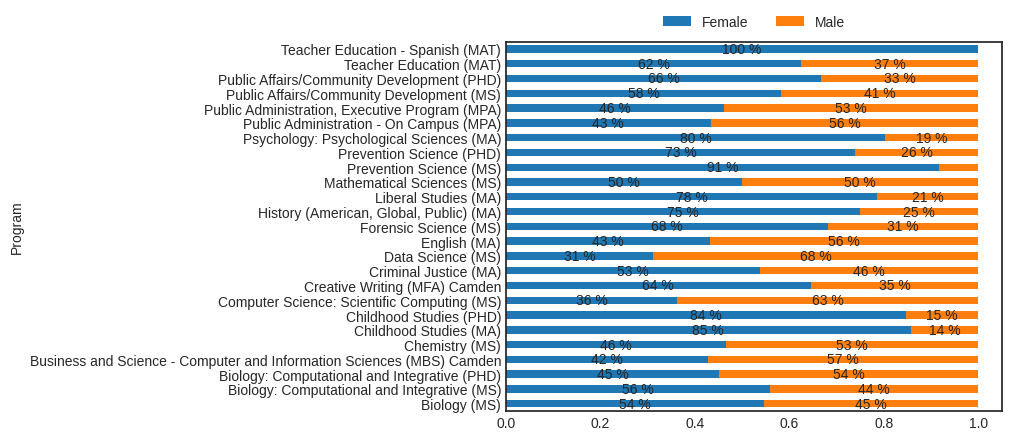

In [ ]:
#This needs to be run every time.
_var, y_var = "Program", "Gender"
fall_grouped = fall.groupby("Program")["Gender"].value_counts(normalize=True).unstack(y_var)
fall_grouped.plot.barh(stacked=True).figsize=(25,25)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
for ix, row in fall_grouped.reset_index(drop=True).iterrows():
        print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element;

### Home Country and State

In [ ]:
#ton of dependencies; also saying here which for what not to get lost
import leafmap
import pycrs #may be needed for some imported data such as shapefiles
import geopandas #may be needed to for some files such a kml
import osmnx #for geocoding, eg we geocode camden
! pip install geocoder                                                                                       
from geopy.geocoders import Nominatim 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#adding geojson
map = f.Map()
map

In [ ]:
geo.head(3)

City        Lat       Long  \
0     Abaam   6.217532  -0.831562   
1  Abeokuta   7.160800   3.348300   
2  Aberdeen  45.464900 -98.468600   

                                        Program        Status  
0                                Chemistry (MS)  Complete App  
1  Biology: Computational and Integrative (PHD)  Admit-Coming  
2                         Forensic Science (MS)  Admit-Coming

In [ ]:
#This only seems to run successfully when I am at work. I guess my home wifi isn't fast enough.
m = leafmap.Map()
m.add_points_from_xy(geo, x="Long", y="Lat")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

The importance of this visualization is in that it helps us to understand who is driving the growth in applications. 

### Race by Program

In [ ]:
race[:].style.background_gradient(cmap="RdYlGn")

What's fascinating here is how Asian student application growth is pushing application growth across so many programs. This is a piece of data I have shared with our marketing team. 

# Next Steps

In future iterations of this project I plan to: 

* Automate the processing of the data. 
* Include outside data to create a regression
* Visualize Admit, AC and Enrollment Data